# 最大カバー問題


In [139]:
import pulp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import japanize_matplotlib

japanize_matplotlib.japanize()
plt.style.use("ggplot")

# パラメータの設定
locations = 5 # 街灯を設置できる場所の数
points = 10      # カバーすべき地点の数
coverage_range = 3  # 街灯がカバーできる距離

# 位置情報（ランダムに生成）
np.random.seed(0)  # 乱数のシード設定で再現性を保証
lamp_positions = np.random.rand(locations, 2) * 10  # 街灯の位置
point_positions = np.random.rand(points, 2) * 10    # 地点の位置

# カバー行列の生成
cover = np.zeros((locations, points), dtype=int)
for i in range(locations):
    for j in range(points):
        if np.linalg.norm(lamp_positions[i] - point_positions[j]) <= coverage_range:
            cover[i, j] = 1

# PuLPの問題設定
prob = pulp.LpProblem("Street_Light_Placement", pulp.LpMaximize)

# 変数
x = pulp.LpVariable.dicts("x", range(locations), cat='Binary')  # 街灯の設置
y = pulp.LpVariable.dicts("y", range(points), cat='Binary')     # 地点のカバー

# 目的関数
prob += pulp.lpSum(y[j] for j in range(points))

# 制約条件
for j in range(points):
    prob += y[j] <= pulp.lpSum(cover[i][j] * x[i] for i in range(locations))

# 特定の地点を必ずカバー
mandatory_points = [0, 1]  # 必ずカバーすべき地点のインデックス
for j in mandatory_points:
    prob += y[j] == 1

# 求解
prob.solve()

# 街灯の設置状況と地点のカバー状況を取得
lamp_status = [pulp.value(x[i]) for i in range(locations)]
point_covered = [pulp.value(y[j]) for j in range(points)]

# 結果の表示
print("Status:", pulp.LpStatus[prob.status])
print("街灯の設置状況:", lamp_status)
print("各地点のカバー状況:", point_covered)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/shugo/Desktop/Lab/高大連携/code/venv_test/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/l6/wzrvt4j10r97v2dkh7l274fw0000gn/T/9b9151a5abf345be80842513594e5be3-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/l6/wzrvt4j10r97v2dkh7l274fw0000gn/T/9b9151a5abf345be80842513594e5be3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 17 COLUMNS
At line 82 RHS
At line 95 BOUNDS
At line 111 ENDATA
Problem MODEL has 12 rows, 15 columns and 24 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 6 - 0.00 seconds
Cgl0002I 4 variables fixed
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from -6 to -1.79769e+308
Probing was t

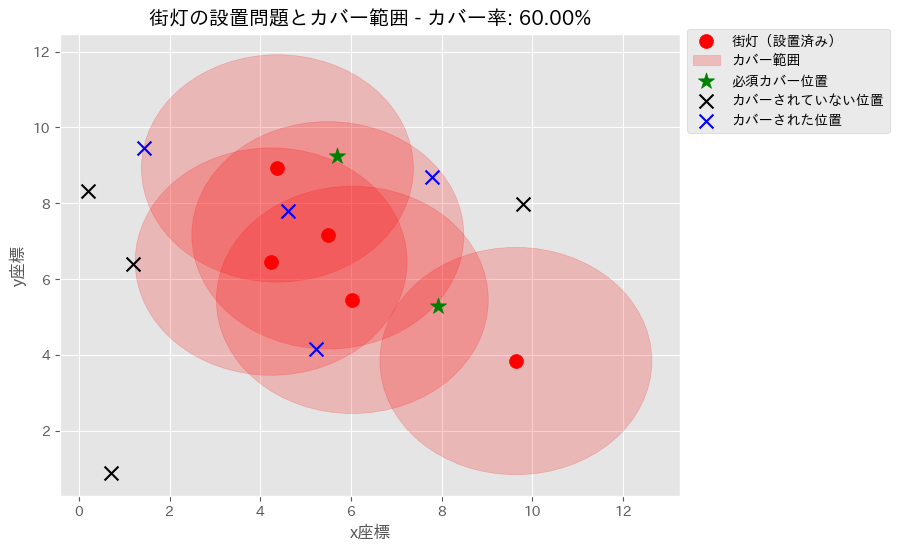

In [140]:
# カバー率を計算
covered_count = sum(point_covered)
coverage_rate = covered_count / points * 100  # カバー率をパーセンテージで表示

# 最初の地点を判例に表示
covered_points = [j for j in range(points) if point_covered[j] == 1]
not_covered_points = [j for j in range(points) if point_covered[j] == 0]

placed_lamps = [i for i in range(locations) if lamp_status[i] == 1]
not_placed_lamps = [i for i in range(locations) if lamp_status[i] == 0]

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(locations):
    if lamp_status[i] == 1:
        ax.scatter(lamp_positions[i, 0], lamp_positions[i, 1], c='red', s=100, label='街灯（設置済み）' if i == placed_lamps[0] else "")
        # カバー範囲の円を追加
        circle = patches.Circle((lamp_positions[i, 0], lamp_positions[i, 1]), coverage_range, color='red', alpha=0.2, label='カバー範囲' if i == 0 else "")
        ax.add_patch(circle)
    else:
        ax.scatter(lamp_positions[i, 0], lamp_positions[i, 1], c='gray', s=100, label='街灯（未設置）' if i == not_placed_lamps[-1] else "")
for j in range(points):
    if j in mandatory_points:
        marker = '*'  # 星形マーカー
        color = 'green'  # 緑色
        size = 150  # サイズを大きく
        label = '必須カバー位置' if j == mandatory_points[0] else ""
    elif point_covered[j] == 1:
        marker = 'x'
        color = 'blue'
        size = 100
        label = 'カバーされた位置' if j == covered_points[-1] and j not in mandatory_points else ""
    else:
        marker = 'x'
        color = 'black'
        size = 100
        label = 'カバーされていない位置' if j == not_covered_points[-1] and j not in mandatory_points else ""
    ax.scatter(point_positions[j, 0], point_positions[j, 1], c=color, marker=marker, s=size, label=label)

# タイトルにカバー率を追加
ax.set_title(f"街灯の設置問題とカバー範囲 - カバー率: {coverage_rate:.2f}%")
ax.set_xlabel("x座標")
ax.set_ylabel("y座標")
fig.legend(loc='upper left', bbox_to_anchor=(0.9, 0.9))
plt.grid(True)
plt.show()